In [1]:
__author__ = 'dilmiperera'

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Load stats
import scipy.stats as stats

# Load matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Load scikit's classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

/Users/pererad1/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/pererad1/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, file='', proba=True, skip=0,):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
        
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.8, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.8, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    ##label_kwargs = {}
    ##label_kwargs['bbox'] = dict(
    ##    boxstyle='round,pad=0.3', alpha=0.2,
    ##)
    ##for k in range(0, fpr.shape[0],labe):
    ##    #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
    ##    threshold = str(np.round(thresholds[k], 2))
    ##    ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    print("fpr",fpr)
    print("tpr",tpr)
    print("thresholds",thresholds)
    plt.savefig(file)
    return ax

In [3]:
def make_pr(name, clf, ytest, xtest, ax=None, labe=5, file='', proba=True, skip=0,):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        precision, recall, thresholds = precision_recall_curve(y_test,clf.predict_proba(xtest)[:,1])
        average_precision = average_precision_score(y_test, clf.predict_proba(xtest)[:,1])
        
    else:
        precision, recall, thresholds = precision_recall_curve(y_test,clf.decision_function(xtest))
        average_precision = average_precision_score(y_test, clf.decision_function(xtest))
    
    if skip:
        l=recall.shape[0]
        ax.plot(recall[0:l:skip], precision[0:l:skip], '.-', alpha=0.8, label='PR curve for %s (area = %0.2f)' % (name, average_precision))
    else:
        ax.plot(recall, precision, '.-', alpha=0.8, label='PR curve for %s (area = %0.2f)' % (name, average_precision))
    ##label_kwargs = {}
    ##label_kwargs['bbox'] = dict(
    ##    boxstyle='round,pad=0.3', alpha=0.2,
    ##)
    ##for k in range(0, fpr.shape[0],labe):
    ##    #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
    ##    threshold = str(np.round(thresholds[k], 2))
    ##    ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_title('Precision-Recall')
    ax.legend(loc="lower right")
    print("recall",recall)
    print("precision",precision)
    print("thresholds",thresholds)
    plt.savefig(file)
    return ax

In [4]:
def make_pr_true(name, clf, ytest, xtest, ax=None, labe=5, file='', proba=True, skip=0,):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        precision, recall, thresholds = precision_recall_curve(y_test,clf.predict_proba(xtest)[:,1])
        average_precision = average_precision_score(y_test, clf.predict_proba(xtest)[:,1])
        
    else:
        precision, recall, thresholds = precision_recall_curve(y_test,clf.decision_function(xtest))
        average_precision = average_precision_score(y_test, clf.decision_function(xtest))
    
    precision=7*(precision-0.001)/(27-20*precision)
    if skip:
        l=recall.shape[0]
        ax.plot(recall[0:l:skip], precision[0:l:skip], '.-', alpha=0.8, label='PR curve for %s ' % (name))
    else:
        ax.plot(recall, precision, '.-', alpha=0.8, label='PR curve for %s ' % (name))
    ##label_kwargs = {}
    ##label_kwargs['bbox'] = dict(
    ##    boxstyle='round,pad=0.3', alpha=0.2,
    ##)
    ##for k in range(0, fpr.shape[0],labe):
    ##    #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
    ##    threshold = str(np.round(thresholds[k], 2))
    ##    ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_title('Precision-Recall (90:10)')
    ax.legend(loc="lower right")
    print("recall",recall)
    print("precision",precision)
    print("thresholds",thresholds)
    plt.savefig(file)
    return ax

In [5]:
data=pd.read_csv('ALL_normalized_log2_data_loginv_QC_filtered-for_Model.txt', sep='\t')
sex_factorized=(data['Sex'].values=='F')*1
BRAF_factorised=(data['BRAF V600E called'].values=='Y')*1
TERT_factorized=(data['TERT Promoter called'].values=='Y')*1
data['Sex']=sex_factorized
data['BRAF V600E called']=BRAF_factorised
data['TERT Promoter called']=TERT_factorized
temp=data[data.columns[1:(len(data.columns))]]
data=temp
data

,NECAB1,ERCC2,SDC1,TFRC,JAZF1,NME1,ZNF708,HGD,TACSTD2,JAG1,...,SNRPB,CDH4,GLT8D2,C7orf49,GABRB2,TCL6,Sex,BRAF V600E called,TERT Promoter called,Nodal Status
0,7.647061,156.417155,446.310283,328.128432,447.005470,431.016161,109.144415,62.566862,9.732623,446.310283,...,784.171338,38.930492,117.486663,155.026780,878.716818,2.780749,1,1,0,N0
1,9.943617,113.474212,266.137972,383.121695,388.970882,389.555800,153.833597,112.304375,12.283291,299.478333,...,690.203970,5.264268,99.436165,151.493922,105.285351,7.019023,1,0,0,N0
2,28.746761,133.142895,441.792335,422.123498,496.259883,266.285791,107.422109,261.746828,13.616887,761.032686,...,632.428753,10.590912,453.896234,96.831197,98.344184,9.077925,1,1,0,N1
3,13.554161,169.070325,265.376206,303.185182,396.637556,435.159908,166.216817,117.707188,22.114684,587.109187,...,699.822737,13.554161,268.229714,154.089410,296.051413,5.707015,1,1,0,N1
4,16.356222,161.045877,349.771514,596.373012,347.255172,344.738830,169.853073,149.722339,17.614393,670.605096,...,664.314242,13.839880,202.565517,130.849775,421.487256,12.581709,1,1,0,N1
5,6.980736,141.941633,328.094595,402.555780,563.112709,307.152387,123.326337,95.403393,6.980736,197.787522,...,570.093445,39.557504,95.403393,160.556929,362.998275,2.326912,1,0,0,N0
6,7.912954,155.621434,261.127491,324.431125,451.038393,298.054611,155.621434,42.202423,13.188257,377.184153,...,619.848084,10.550606,158.259085,232.113325,419.386576,5.275303,1,0,0,N0
7,12.413574,148.962886,409.647935,371.372749,423.095974,340.338815,221.375399,376.545072,8.275716,429.302760,...,546.197247,12.413574,91.032875,168.617711,23.792683,2.068929,1,0,0,N0
8,13.461281,115.767017,467.106451,238.264674,436.145505,305.571079,148.074091,55.191252,6.730641,363.454588,...,704.024997,22.884178,148.074091,150.766347,380.954253,8.076769,1,1,0,N0
9,13.546435,158.686805,574.755867,344.466479,729.572262,498.315272,178.038854,781.822795,22.254857,459.611173,...,490.574452,8.708422,383.170578,157.719202,7.740820,7.740820,1,0,0,N0


In [6]:
data.columns

Index(['NECAB1', 'ERCC2', 'SDC1', 'TFRC', 'JAZF1', 'NME1', 'ZNF708', 'HGD',
       'TACSTD2', 'JAG1',
       ...
       'SNRPB', 'CDH4', 'GLT8D2', 'C7orf49', 'GABRB2', 'TCL6', 'Sex',
       'BRAF V600E called', 'TERT Promoter called', 'Nodal Status'],
      dtype='object', length=242)

In [139]:
data_labels = data.columns[0:(len(data.columns)-3)]

data_labels
X_all = data[data_labels].as_matrix()
#y_all = pd.factorize(data['Nodal Status'])[0]
y_all=(data['Nodal Status'].values=='N1')*1
len(y_all)

101

### PCA

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X = pca.fit_transform(X_all)
pca.explained_variance_ratio_*100

array([ 89.03381662,   5.03037367,   2.3443923 ,   1.0300295 ,
         0.62324915,   0.37698283,   0.30288966,   0.24757747,
         0.17688894,   0.15596557])

In [9]:
df = pd.DataFrame({"y":y_all, "label":np.where(y_all==1, "N1", "N0")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.tail()

,label,y,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
96,N0,0,-6886.514215,15430.512779,2448.349110,20562.197254,-3338.123675,622.800159,-7580.402238,5060.018729,-198.795672,-2195.268384
97,N1,1,17808.679885,3488.322953,11721.928107,-4368.512575,1719.237276,-2528.589130,3220.601788,4185.550306,-3044.764111,-2085.688091
98,N1,1,-11.569827,-4866.297096,9388.587011,-5746.561272,3840.322342,587.846717,-3637.085516,12332.206902,-5311.850273,-903.105661
99,N1,1,47757.474564,4555.588694,-7005.032077,2960.811750,-2386.777789,-1891.681665,-142.154900,-1368.391856,-5169.349533,116.587827
100,N1,1,40442.254134,21628.155948,24275.311037,-17534.881102,6678.316762,6539.117739,-449.944095,618.724989,4306.045057,-4369.704370


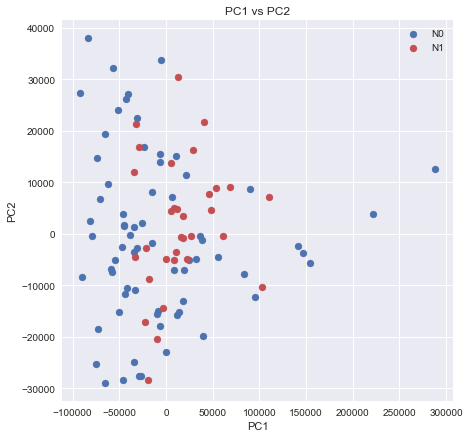

In [10]:
mpl.rcParams['figure.figsize']=(7.0,7.0)
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')

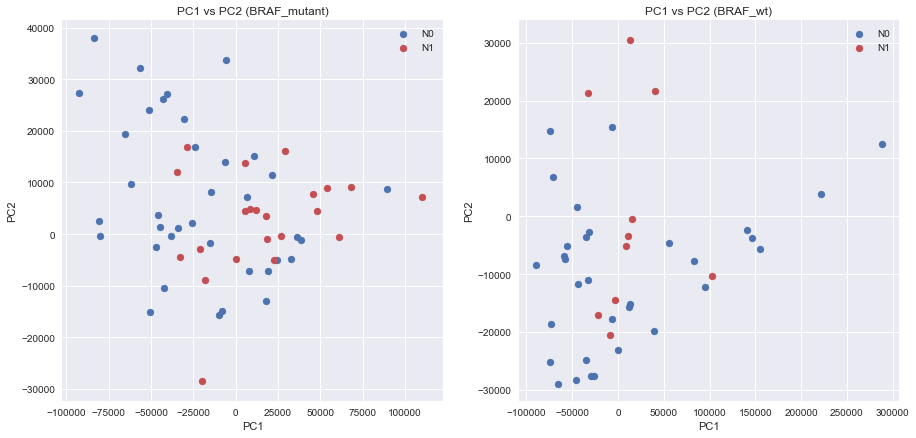

In [141]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
colors = [c0, c2]
df_BRAF=df[data['BRAF V600E called']==1]
plt.subplot(1, 2, 1)
for label, color in zip(df['label'].unique(), colors):
    mask = df_BRAF['label']==label
    plt.scatter(df_BRAF[mask]['pc1'], df_BRAF[mask]['pc2'], c=color, label=label)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 (BRAF_mutant)')

mpl.rcParams['figure.figsize']=(15.0,7.0)

df_no_BRAF=df[data['BRAF V600E called']==0]
plt.subplot(1, 2, 2)
for label, color in zip(df['label'].unique(), colors):
    mask = df_no_BRAF['label']==label
    plt.scatter(df_no_BRAF[mask]['pc1'], df_no_BRAF[mask]['pc2'], c=color, label=label)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 (BRAF_wt)')

plt.show()


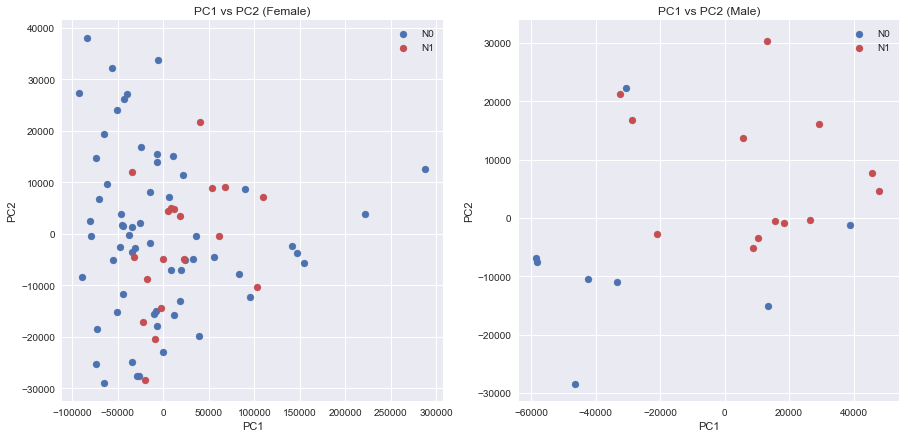

In [142]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
colors = [c0, c2]
df_BRAF=df[data['Sex']==1]
plt.subplot(1, 2, 1)
for label, color in zip(df['label'].unique(), colors):
    mask = df_BRAF['label']==label
    plt.scatter(df_BRAF[mask]['pc1'], df_BRAF[mask]['pc2'], c=color, label=label)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 (Female)')

mpl.rcParams['figure.figsize']=(15.0,7.0)

df_no_BRAF=df[data['Sex']==0]
plt.subplot(1, 2, 2)
for label, color in zip(df['label'].unique(), colors):
    mask = df_no_BRAF['label']==label
    plt.scatter(df_no_BRAF[mask]['pc1'], df_no_BRAF[mask]['pc2'], c=color, label=label)
plt.legend()

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 (Male)')

plt.show()

In [13]:
# Split testing and training sets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, test_size=0.40,stratify=y_all, random_state=5)
#print("Fraction of N1 in training set: " ,sum(y_train),"/",len(y_train))

### Logistic Regression with l2 regularization 

In [75]:
num_of_crossval = 6

tune_params = [{'C': [1000,100, 10,1.0, 0.1]}]
final_Results_mat = []
fold = 0

print('Fold : {0}'.format(fold))

print('Training starting ... ')
model=LogisticRegression(C=100,penalty='l2')
gsCV = GridSearchCV(model, tune_params, scoring='f1_weighted',cv=num_of_crossval, n_jobs=1)
print('Create model ... ')
gsCV.fit(X_train, y_train)
print('Training complete ... ')
print(gsCV.best_params_)
print(gsCV.grid_scores_)
for params, mean_score, scores in gsCV.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

print(gsCV.best_estimator_)


Fold : 0
Training starting ... 
Create model ... 
Training complete ... 
{'C': 1000}
[mean: 0.77721, std: 0.06259, params: {'C': 1000}, mean: 0.77721, std: 0.06259, params: {'C': 100}, mean: 0.77721, std: 0.06259, params: {'C': 10}, mean: 0.77721, std: 0.06259, params: {'C': 1.0}, mean: 0.77721, std: 0.06259, params: {'C': 0.1}]
0.777 (+/-0.125) for {'C': 1000}
0.777 (+/-0.125) for {'C': 100}
0.777 (+/-0.125) for {'C': 10}
0.777 (+/-0.125) for {'C': 1.0}
0.777 (+/-0.125) for {'C': 0.1}
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


fpr [ 0.          0.          0.03571429  0.03571429  0.07142857  0.07142857
  0.17857143  0.17857143  0.21428571  0.21428571  0.53571429  0.53571429
  0.60714286  0.60714286  1.        ]
tpr [ 0.07692308  0.53846154  0.53846154  0.61538462  0.61538462  0.69230769
  0.69230769  0.76923077  0.76923077  0.84615385  0.84615385  0.92307692
  0.92307692  1.          1.        ]
thresholds [  1.00000000e+00   9.01501628e-01   5.83096687e-01   1.75344743e-01
   1.31809345e-02   6.36715158e-03   6.76340691e-04   3.40010865e-04
   2.12558948e-04   9.20295756e-05   2.72667723e-08   1.63049052e-08
   4.76317512e-10   4.40680194e-10   5.24838294e-23]


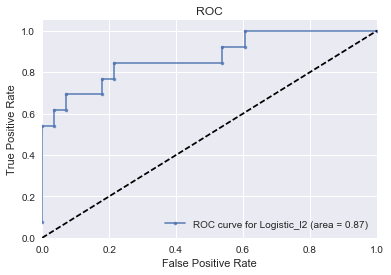

In [76]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_roc("Logistic_l2",gsCV.best_estimator_ , y_test, X_test, labe=15)

recall [ 1.          0.92307692  0.92307692  0.92307692  0.84615385  0.84615385
  0.84615385  0.84615385  0.84615385  0.84615385  0.84615385  0.84615385
  0.84615385  0.84615385  0.76923077  0.76923077  0.69230769  0.69230769
  0.69230769  0.69230769  0.61538462  0.61538462  0.53846154  0.53846154
  0.46153846  0.38461538  0.30769231  0.23076923  0.15384615  0.07692308
  0.        ]
precision [ 0.43333333  0.4137931   0.42857143  0.44444444  0.42307692  0.44
  0.45833333  0.47826087  0.5         0.52380952  0.55        0.57894737
  0.61111111  0.64705882  0.625       0.66666667  0.64285714  0.69230769
  0.75        0.81818182  0.8         0.88888889  0.875       1.          1.
  1.          1.          1.          1.          1.          1.        ]
thresholds [  4.40680194e-10   4.76317512e-10   8.98727588e-09   1.63049052e-08
   2.72667723e-08   9.37903454e-08   3.02296972e-07   4.56362233e-07
   7.06184397e-07   1.21780079e-06   1.46140378e-06   1.53691760e-05
   7.49327841e-05   9.

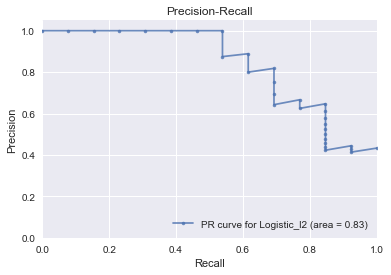

In [77]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr("Logistic_l2",gsCV.best_estimator_ , y_test, X_test, labe=15)

recall [ 1.          0.92307692  0.92307692  0.92307692  0.84615385  0.84615385
  0.84615385  0.84615385  0.84615385  0.84615385  0.84615385  0.84615385
  0.84615385  0.84615385  0.76923077  0.76923077  0.69230769  0.69230769
  0.69230769  0.69230769  0.61538462  0.61538462  0.53846154  0.53846154
  0.46153846  0.38461538  0.30769231  0.23076923  0.15384615  0.07692308
  0.        ]
precision [ 0.16507273  0.15432228  0.16241085  0.17139264  0.15937344  0.16884615
  0.17951402  0.19161845  0.20547059  0.22147839  0.2401875   0.26234471
  0.289       0.32167782  0.30124138  0.34095122  0.31768687  0.36788889
  0.43691667  0.53780342  0.50845455  0.67393976  0.644       0.999       0.999
  0.999       0.999       0.999       0.999       0.999       0.999     ]
thresholds [  4.40680194e-10   4.76317512e-10   8.98727588e-09   1.63049052e-08
   2.72667723e-08   9.37903454e-08   3.02296972e-07   4.56362233e-07
   7.06184397e-07   1.21780079e-06   1.46140378e-06   1.53691760e-05
   7.49327841

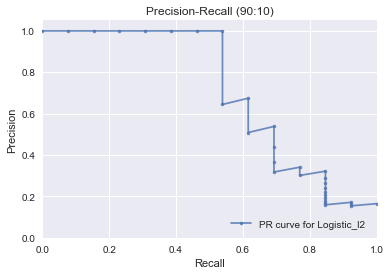

In [78]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr_true("Logistic_l2",gsCV.best_estimator_ , y_test, X_test, labe=15)

In [18]:
best_features=gsCV.best_estimator_.coef_[0]
feature_importance=pd.DataFrame(best_features,columns=['Importance'])
feature_importance['Features']=data_labels

feature_importance

,Importance,Features
0,0.000003,NECAB1
1,0.000063,ERCC2
2,-0.000697,SDC1
3,-0.000077,TFRC
4,-0.000476,JAZF1
5,0.000354,NME1
6,-0.000035,ZNF708
7,-0.000409,HGD
8,0.000035,TACSTD2
9,-0.000175,JAG1


### Logistic Regression with l1 regularization

In [79]:
num_of_crossval = 6

tune_params = [{'C': [1000,100, 10,1.0, 0.1]}]
final_Results_mat = []
fold = 0

print('Fold : {0}'.format(fold))

print('Training Starting ... ')
model=LogisticRegression(C=100,penalty='l1')
gsCV = GridSearchCV(model, tune_params, scoring='f1_weighted', cv=num_of_crossval, n_jobs=1)
print('Create model ... ')
gsCV.fit(X_train, y_train)
print('Training complete ... ')
print(gsCV.best_params_)
print(gsCV.grid_scores_)
for params, mean_score, scores in gsCV.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

print(gsCV.best_estimator_)


Fold : 0
Training Starting ... 
Create model ... 
Training complete ... 
{'C': 1.0}
[mean: 0.74095, std: 0.07656, params: {'C': 1000}, mean: 0.72691, std: 0.08335, params: {'C': 100}, mean: 0.77721, std: 0.06259, params: {'C': 10}, mean: 0.77724, std: 0.10716, params: {'C': 1.0}, mean: 0.76415, std: 0.12243, params: {'C': 0.1}]
0.741 (+/-0.153) for {'C': 1000}
0.727 (+/-0.167) for {'C': 100}
0.777 (+/-0.125) for {'C': 10}
0.777 (+/-0.214) for {'C': 1.0}
0.764 (+/-0.245) for {'C': 0.1}
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


fpr [ 0.          0.          0.17857143  0.17857143  0.39285714  0.39285714
  0.53571429  0.53571429  0.67857143  0.67857143  1.          1.        ]
tpr [ 0.07692308  0.61538462  0.61538462  0.69230769  0.69230769  0.76923077
  0.76923077  0.84615385  0.84615385  0.92307692  0.92307692  1.        ]
thresholds [  1.00000000e+00   9.71299451e-01   1.25240550e-01   1.17361717e-02
   1.55773994e-03   1.20514441e-03   7.31149470e-05   7.26852374e-05
   1.47839237e-06   8.61387994e-07   1.76087856e-11   1.71506258e-11]


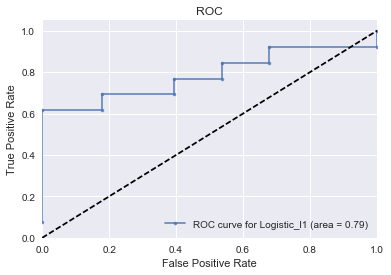

In [80]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_roc("Logistic_l1",gsCV.best_estimator_ , y_test, X_test, labe=15)

recall [ 1.          0.92307692  0.92307692  0.92307692  0.92307692  0.92307692
  0.92307692  0.92307692  0.92307692  0.92307692  0.92307692  0.84615385
  0.84615385  0.84615385  0.84615385  0.84615385  0.76923077  0.76923077
  0.76923077  0.76923077  0.76923077  0.69230769  0.69230769  0.69230769
  0.69230769  0.69230769  0.69230769  0.69230769  0.61538462  0.61538462
  0.61538462  0.61538462  0.61538462  0.61538462  0.53846154  0.46153846
  0.38461538  0.30769231  0.23076923  0.15384615  0.07692308  0.        ]
precision [ 0.31707317  0.3         0.30769231  0.31578947  0.32432432  0.33333333
  0.34285714  0.35294118  0.36363636  0.375       0.38709677  0.36666667
  0.37931034  0.39285714  0.40740741  0.42307692  0.4         0.41666667
  0.43478261  0.45454545  0.47619048  0.45        0.47368421  0.5
  0.52941176  0.5625      0.6         0.64285714  0.61538462  0.66666667
  0.72727273  0.8         0.88888889  1.          1.          1.          1.
  1.          1.          1.        

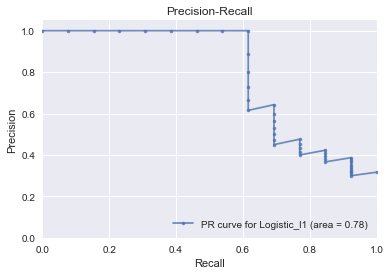

In [82]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr("Logistic_l1",gsCV.best_estimator_ , y_test, X_test, labe=15)

recall [ 1.          0.92307692  0.92307692  0.92307692  0.92307692  0.92307692
  0.92307692  0.92307692  0.92307692  0.92307692  0.92307692  0.84615385
  0.84615385  0.84615385  0.84615385  0.84615385  0.76923077  0.76923077
  0.76923077  0.76923077  0.76923077  0.69230769  0.69230769  0.69230769
  0.69230769  0.69230769  0.69230769  0.69230769  0.61538462  0.61538462
  0.61538462  0.61538462  0.61538462  0.61538462  0.53846154  0.46153846
  0.38461538  0.30769231  0.23076923  0.15384615  0.07692308  0.        ]
precision [ 0.10709917  0.09966667  0.10298524  0.10653181  0.1103307   0.11440984
  0.11880142  0.12354277  0.12867742  0.13425641  0.14034003  0.13015254
  0.13640675  0.14329104  0.1509057   0.15937344  0.147       0.155875
  0.16588836  0.17727411  0.19033515  0.17461111  0.18878979  0.20547059
  0.22537993  0.24955556  0.27953333  0.31768687  0.29271728  0.34095122
  0.40819708  0.50845455  0.67393976  0.999       0.999       0.999       0.999
  0.999       0.999       0.

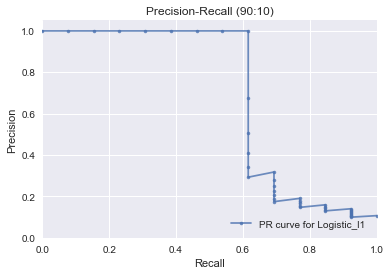

In [83]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr_true("Logistic_l1",gsCV.best_estimator_ , y_test, X_test, labe=15)

In [23]:
best_features=gsCV.best_estimator_.coef_[0]
feature_importance=pd.DataFrame(best_features,columns=['Importance'])
feature_importance['Features']=data_labels
print("Number of features:", len(feature_importance[feature_importance['Importance']>0]))
feature_importance[feature_importance['Importance']>0]

Number of features: 24


,Importance,Features
16,0.001381,CD47
20,0.000453,FAM46C
24,0.000094,SFRP2
27,0.002067,S100A4
43,0.004713,MYADM
48,0.000718,XBP1
51,0.002002,PDE5A
52,0.000020,TG
59,0.000489,CCND2
67,0.000231,FN1


## Random Forest

In [84]:
num_of_crossval = 5

#To store output
classArray_train = np.zeros(len(y_train))
classArray_test = np.zeros((len(y_test), num_of_crossval))
#kf = cross_validation.StratifiedKFold(y_train, n_folds=num_of_crossval, shuffle=False)
#X_train_kf, X_test_kf, y_train_kf, y_test_kf = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
#Number of trees for grid search(drawing the graph to find the optimum parameter)
tune_params = [{'n_estimators': [10, 100, 150, 200, 250, 300, 400, 500]}]
#tune_params = [{'n_estimators': [ 400]}]
final_Results_mat = []
fold = 0

print('Fold : {0}'.format(fold))

print('Training Starting ... ')
model=RandomForestClassifier(n_estimators=100, class_weight='auto',random_state=1)
gsCV = GridSearchCV(model, tune_params, scoring='f1_weighted', cv=num_of_crossval, n_jobs=1)
print('Create model ... ')
gsCV.fit(X_train, y_train)
print('Training complete ... ')
print(gsCV.best_params_)
print(gsCV.grid_scores_)
for params, mean_score, scores in gsCV.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))
print(gsCV.best_estimator_)
rf_best=gsCV.best_estimator_

Fold : 0
Training Starting ... 
Create model ... 


/Users/pererad1/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pererad1/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pererad1/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pererad1/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pererad1/anac

Training complete ... 
{'n_estimators': 500}
[mean: 0.62748, std: 0.10777, params: {'n_estimators': 10}, mean: 0.71999, std: 0.10200, params: {'n_estimators': 100}, mean: 0.71999, std: 0.10200, params: {'n_estimators': 150}, mean: 0.74167, std: 0.08744, params: {'n_estimators': 200}, mean: 0.74167, std: 0.08744, params: {'n_estimators': 250}, mean: 0.74167, std: 0.08744, params: {'n_estimators': 300}, mean: 0.74167, std: 0.08744, params: {'n_estimators': 400}, mean: 0.75432, std: 0.06904, params: {'n_estimators': 500}]
0.627 (+/-0.216) for {'n_estimators': 10}
0.720 (+/-0.204) for {'n_estimators': 100}
0.720 (+/-0.204) for {'n_estimators': 150}
0.742 (+/-0.175) for {'n_estimators': 200}
0.742 (+/-0.175) for {'n_estimators': 250}
0.742 (+/-0.175) for {'n_estimators': 300}
0.742 (+/-0.175) for {'n_estimators': 400}
0.754 (+/-0.138) for {'n_estimators': 500}
RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_l

fpr [ 0.          0.          0.03571429  0.03571429  0.14285714  0.14285714
  0.21428571  0.21428571  0.25        0.25        1.        ]
tpr [ 0.07692308  0.23076923  0.23076923  0.76923077  0.76923077  0.84615385
  0.84615385  0.92307692  0.92307692  1.          1.        ]
thresholds [ 0.634  0.512  0.508  0.45   0.358  0.334  0.328  0.324  0.31   0.306
  0.028]


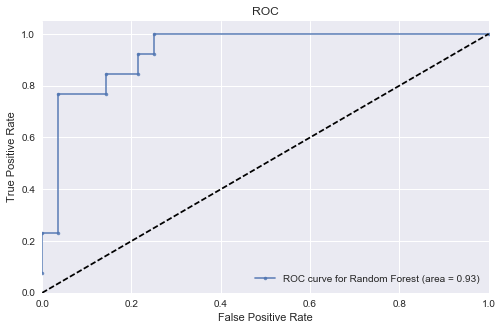

In [143]:

#mpl.rcParams['figure.figsize']=(6.0,4.0)
#ax=make_roc("Random Forrest",rf_best , y_test, X_test, labe=15)

mpl.rcParams['figure.figsize']=(8.0,5.0)
ax=make_roc("Random Forest",rf_best , y_test, X_test, file='RF-test-roc.png')

recall [ 1.          0.92307692  0.92307692  0.84615385  0.84615385  0.84615385
  0.76923077  0.76923077  0.76923077  0.76923077  0.69230769  0.61538462
  0.53846154  0.46153846  0.38461538  0.30769231  0.23076923  0.23076923
  0.15384615  0.07692308  0.        ]
precision [ 0.65        0.63157895  0.66666667  0.64705882  0.6875      0.73333333
  0.71428571  0.76923077  0.83333333  0.90909091  0.9         0.88888889
  0.875       0.85714286  0.83333333  0.8         0.75        1.          1.
  1.          1.        ]
thresholds [ 0.306  0.31   0.324  0.328  0.33   0.334  0.358  0.374  0.448  0.45
  0.476  0.48   0.484  0.49   0.498  0.502  0.508  0.512  0.588  0.634]


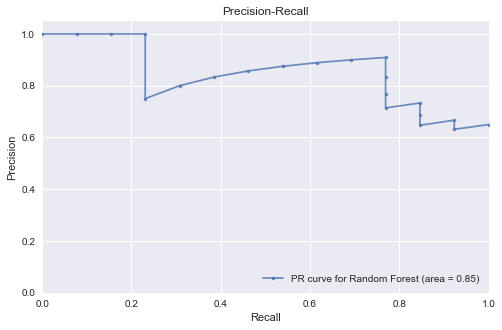

In [125]:
mpl.rcParams['figure.figsize']=(8.0,5.0)
ax=make_pr("Random Forest",rf_best, y_test, X_test, labe=15,file='RF-test-pr.png')

recall [ 1.          0.92307692  0.92307692  0.84615385  0.84615385  0.84615385
  0.76923077  0.76923077  0.76923077  0.76923077  0.69230769  0.61538462
  0.53846154  0.46153846  0.38461538  0.30769231  0.23076923  0.23076923
  0.15384615  0.07692308  0.        ]
precision [ 0.3245      0.30720513  0.34095122  0.32167782  0.36267925  0.41564865
  0.39270787  0.46297351  0.56383871  0.72085567  0.69922222  0.67393976
  0.644       0.60798551  0.56383871  0.50845455  0.43691667  0.999       0.999
  0.999       0.999     ]
thresholds [ 0.306  0.31   0.324  0.328  0.33   0.334  0.358  0.374  0.448  0.45
  0.476  0.48   0.484  0.49   0.498  0.502  0.508  0.512  0.588  0.634]


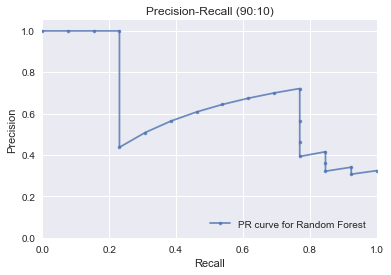

In [74]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr_true("Random Forest",rf_best , y_test, X_test, labe=15)

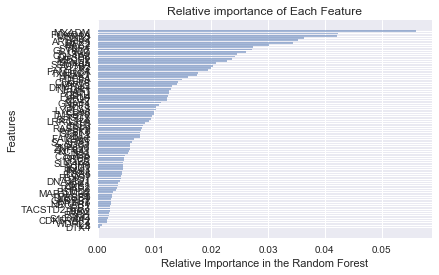

In [55]:

importance_list = rf_best.feature_importances_
name_list = data.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
temp=pd.DataFrame(sorted(zip(importance_list, name_list)), columns=['Importance','Feature'])
feature_importance_rf=temp[temp['Importance']>0]
plt.barh(np.arange(len(feature_importance_rf.Feature)), feature_importance_rf.Importance, align='center', alpha=0.5)
plt.yticks(np.arange(len(feature_importance_rf.Feature)), feature_importance_rf.Feature)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
old=mpl.rcParams['figure.figsize']
mpl.rcParams['figure.figsize']=(6.0,30.0)
plt.show()
#mpl.rcParams['figure.figsize']=(6.0,4.0)

### AdaBoost 

In [86]:
num_of_crossval=4
tune_params = {"n_estimators":[30, 40,50,100,150,200,300] }
final_Results_mat = []
fold = 0

print('Fold : {0}'.format(fold))

print('Training ... ')
model=AdaBoostClassifier(n_estimators=100, random_state=1)
gsCV = GridSearchCV(model, tune_params,scoring='f1_weighted', cv=num_of_crossval, n_jobs=1)
print('Create model ... ')
gsCV.fit(X_train, y_train)
print('Training complete ... ')
print(gsCV.best_params_)
print(gsCV.grid_scores_)
for params, mean_score, scores in gsCV.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

Fold : 0
Training ... 
Create model ... 
Training complete ... 
{'n_estimators': 100}
[mean: 0.68838, std: 0.10668, params: {'n_estimators': 30}, mean: 0.76448, std: 0.04305, params: {'n_estimators': 40}, mean: 0.76633, std: 0.04174, params: {'n_estimators': 50}, mean: 0.78392, std: 0.05149, params: {'n_estimators': 100}, mean: 0.78392, std: 0.05149, params: {'n_estimators': 150}, mean: 0.75059, std: 0.09633, params: {'n_estimators': 200}, mean: 0.76894, std: 0.11009, params: {'n_estimators': 300}]
0.688 (+/-0.213) for {'n_estimators': 30}
0.764 (+/-0.086) for {'n_estimators': 40}
0.766 (+/-0.083) for {'n_estimators': 50}
0.784 (+/-0.103) for {'n_estimators': 100}
0.784 (+/-0.103) for {'n_estimators': 150}
0.751 (+/-0.193) for {'n_estimators': 200}
0.769 (+/-0.220) for {'n_estimators': 300}


fpr [ 0.          0.          0.03571429  0.03571429  0.10714286  0.10714286
  0.17857143  0.17857143  0.21428571  0.21428571  0.25        0.25
  0.28571429  0.28571429  0.32142857  0.32142857  1.        ]
tpr [ 0.07692308  0.30769231  0.30769231  0.46153846  0.46153846  0.53846154
  0.53846154  0.61538462  0.61538462  0.69230769  0.69230769  0.84615385
  0.84615385  0.92307692  0.92307692  1.          1.        ]
thresholds [ 0.71849778  0.62110436  0.59941855  0.56654398  0.54765916  0.54435747
  0.52526236  0.50917456  0.49563801  0.48088502  0.44151169  0.43515448
  0.43425971  0.41719455  0.40355916  0.38650618  0.10529919]


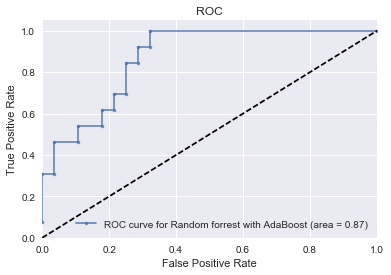

In [87]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_roc("Random forrest with AdaBoost",gsCV , y_test, X_test, labe=15)

recall [ 1.          0.92307692  0.92307692  0.84615385  0.84615385  0.76923077
  0.69230769  0.69230769  0.61538462  0.61538462  0.53846154  0.53846154
  0.53846154  0.46153846  0.46153846  0.46153846  0.38461538  0.30769231
  0.30769231  0.23076923  0.15384615  0.07692308  0.        ]
precision [ 0.59090909  0.57142857  0.6         0.57894737  0.61111111  0.58823529
  0.5625      0.6         0.57142857  0.61538462  0.58333333  0.63636364
  0.7         0.66666667  0.75        0.85714286  0.83333333  0.8         1.
  1.          1.          1.          1.        ]
thresholds [ 0.38650618  0.40355916  0.41719455  0.43425971  0.43515448  0.43677911
  0.44151169  0.48088502  0.49563801  0.50917456  0.52526236  0.52772479
  0.54435747  0.54765916  0.55485176  0.56654398  0.58762458  0.59941855
  0.62110436  0.64629289  0.67614162  0.71849778]


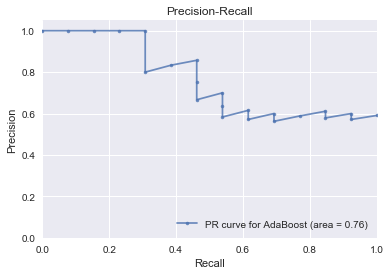

In [88]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr("AdaBoost",gsCV.best_estimator_ , y_test, X_test, labe=15)

recall [ 1.          0.92307692  0.92307692  0.84615385  0.84615385  0.76923077
  0.69230769  0.69230769  0.61538462  0.61538462  0.53846154  0.53846154
  0.53846154  0.46153846  0.46153846  0.46153846  0.38461538  0.30769231
  0.30769231  0.23076923  0.15384615  0.07692308  0.        ]
precision [ 0.27199401  0.25643119  0.27953333  0.26234471  0.289       0.26981081
  0.24955556  0.27953333  0.25643119  0.29271728  0.26584783  0.31161146
  0.37638462  0.34095122  0.43691667  0.60798551  0.56383871  0.50845455
  0.999       0.999       0.999       0.999       0.999     ]
thresholds [ 0.38650618  0.40355916  0.41719455  0.43425971  0.43515448  0.43677911
  0.44151169  0.48088502  0.49563801  0.50917456  0.52526236  0.52772479
  0.54435747  0.54765916  0.55485176  0.56654398  0.58762458  0.59941855
  0.62110436  0.64629289  0.67614162  0.71849778]


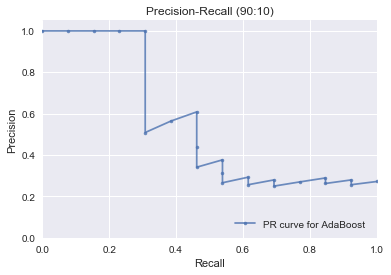

In [89]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr_true("AdaBoost",gsCV.best_estimator_ , y_test, X_test, labe=15)

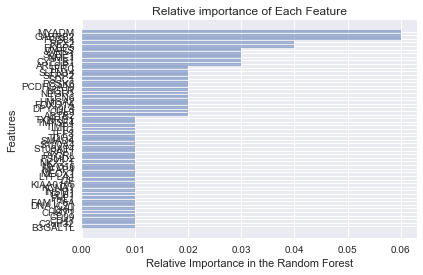

In [90]:
gsCV.best_estimator_.feature_importances_
importance_list = gsCV.best_estimator_.feature_importances_
name_list = data.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
temp=pd.DataFrame(sorted(zip(importance_list, name_list)), columns=['Importance','Feature'])
feature_importance_rf=temp[temp['Importance']>0]
plt.barh(np.arange(len(feature_importance_rf.Feature)), feature_importance_rf.Importance, align='center', alpha=0.5)
plt.yticks(np.arange(len(feature_importance_rf.Feature)), feature_importance_rf.Feature)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
old=mpl.rcParams['figure.figsize']
mpl.rcParams['figure.figsize']=(6.0,10.0)
plt.show()

### Gradient Boosting 

In [92]:

num_of_crossval=4
tune_params ={"n_estimators": [5,8,10,17,20,100,150],"max_depth":[1,2,3,4,5]}
final_Results_mat = []
fold = 0

print('Fold : {0}'.format(fold))

print('Training Starting ... ')
model=GradientBoostingClassifier()
gsCV = GridSearchCV(model, tune_params, scoring='f1_weighted',cv=num_of_crossval, n_jobs=1)
print('Create model ... ')
gsCV.fit(X_train, y_train)
print('Training complete ... ')
print(gsCV.best_params_)
print(gsCV.grid_scores_)
for params, mean_score, scores in gsCV.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))
print(gsCV.best_estimator_)

Fold : 0
Training Starting ... 
Create model ... 


/Users/pererad1/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pererad1/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pererad1/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training complete ... 
{'max_depth': 1, 'n_estimators': 17}
[mean: 0.61346, std: 0.07293, params: {'max_depth': 1, 'n_estimators': 5}, mean: 0.60567, std: 0.05971, params: {'max_depth': 1, 'n_estimators': 8}, mean: 0.60567, std: 0.05971, params: {'max_depth': 1, 'n_estimators': 10}, mean: 0.78072, std: 0.07322, params: {'max_depth': 1, 'n_estimators': 17}, mean: 0.70691, std: 0.12359, params: {'max_depth': 1, 'n_estimators': 20}, mean: 0.75438, std: 0.13237, params: {'max_depth': 1, 'n_estimators': 100}, mean: 0.75755, std: 0.14192, params: {'max_depth': 1, 'n_estimators': 150}, mean: 0.61404, std: 0.10809, params: {'max_depth': 2, 'n_estimators': 5}, mean: 0.66245, std: 0.09379, params: {'max_depth': 2, 'n_estimators': 8}, mean: 0.67079, std: 0.09771, params: {'max_depth': 2, 'n_estimators': 10}, mean: 0.62290, std: 0.12628, params: {'max_depth': 2, 'n_estimators': 17}, mean: 0.66548, std: 0.08438, params: {'max_depth': 2, 'n_estimators': 20}, mean: 0.65412, std: 0.09722, params: {'ma

fpr [ 0.          0.          0.03571429  0.03571429  0.10714286  0.10714286
  0.14285714  0.17857143  0.25        0.32142857  0.32142857  0.35714286
  0.39285714  0.46428571  0.53571429  0.67857143  1.        ]
tpr [ 0.07692308  0.15384615  0.23076923  0.30769231  0.30769231  0.69230769
  0.69230769  0.76923077  0.76923077  0.84615385  0.92307692  1.          1.
  1.          1.          1.          1.        ]
thresholds [ 0.73116842  0.61453203  0.60845867  0.57563312  0.5330349   0.40412778
  0.38233082  0.34497589  0.3426769   0.34211264  0.30983978  0.30726894
  0.27639808  0.23763588  0.18343938  0.17159028  0.14853734]


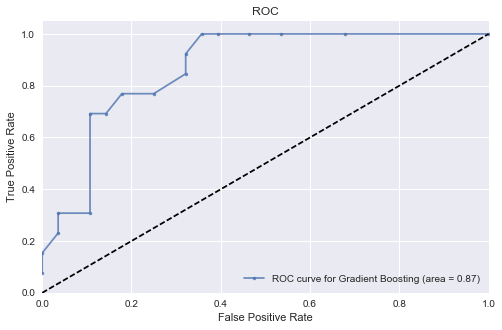

In [93]:
mpl.rcParams['figure.figsize']=(8.0,5.0)
ax=make_roc("Gradient Boosting",gsCV , y_test, X_test, file='GBRF-17-2-test-roc.png')

recall [ 1.          0.92307692  0.84615385  0.76923077  0.76923077  0.69230769
  0.69230769  0.61538462  0.53846154  0.46153846  0.38461538  0.30769231
  0.30769231  0.30769231  0.23076923  0.15384615  0.07692308  0.        ]
precision [ 0.56521739  0.57142857  0.55        0.58823529  0.66666667  0.69230769
  0.75        0.72727273  0.7         0.66666667  0.625       0.57142857
  0.66666667  0.8         0.75        1.          1.          1.        ]
thresholds [ 0.30726894  0.30983978  0.34211264  0.3426769   0.34497589  0.38233082
  0.40412778  0.45769271  0.46224638  0.48164347  0.49270091  0.5330349
  0.56937635  0.57563312  0.60845867  0.61453203  0.73116842]


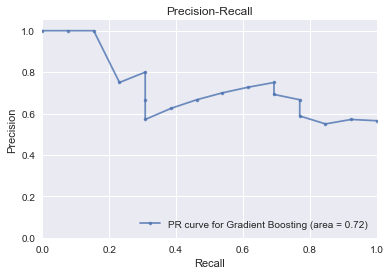

In [94]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr("Gradient Boosting",gsCV.best_estimator_ , y_test, X_test, labe=15)

recall [ 1.          0.92307692  0.84615385  0.76923077  0.76923077  0.69230769
  0.69230769  0.61538462  0.53846154  0.46153846  0.38461538  0.30769231
  0.30769231  0.30769231  0.23076923  0.15384615  0.07692308  0.        ]
precision [ 0.25163158  0.25643119  0.2401875   0.26981081  0.34095122  0.36788889
  0.43691667  0.40819708  0.37638462  0.34095122  0.30124138  0.25643119
  0.34095122  0.50845455  0.43691667  0.999       0.999       0.999     ]
thresholds [ 0.30726894  0.30983978  0.34211264  0.3426769   0.34497589  0.38233082
  0.40412778  0.45769271  0.46224638  0.48164347  0.49270091  0.5330349
  0.56937635  0.57563312  0.60845867  0.61453203  0.73116842]


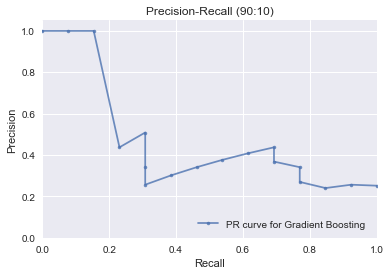

In [95]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr_true("Gradient Boosting",gsCV.best_estimator_ , y_test, X_test, labe=15)

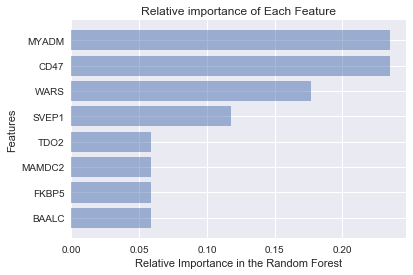

In [96]:
gsCV.best_estimator_.feature_importances_
importance_list = gsCV.best_estimator_.feature_importances_
name_list = data.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
temp=pd.DataFrame(sorted(zip(importance_list, name_list)), columns=['Importance','Feature'])
feature_importance_rf=temp[temp['Importance']>0]
plt.barh(np.arange(len(feature_importance_rf.Feature)), feature_importance_rf.Importance, align='center', alpha=0.5)
plt.yticks(np.arange(len(feature_importance_rf.Feature)), feature_importance_rf.Feature)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
old=mpl.rcParams['figure.figsize']
mpl.rcParams['figure.figsize']=(6.0,10.0)
plt.show()

In [216]:
classArray_test_final = np.mean(classArray_test, axis=1) > 0.5

In [217]:
GBRF=gsCV.best_estimator_

In [97]:
pd.DataFrame(rf_best.predict_proba(X_test),rf_best.predict(X_test))

,0,1
1,0.492,0.508
0,0.864,0.136
0,0.666,0.334
0,0.552,0.448
0,0.520,0.480
0,0.740,0.260
0,0.672,0.328
0,0.718,0.282
1,0.412,0.588
1,0.498,0.502


In [98]:
classArray_test=np.array(pd.DataFrame(rf_best.predict_proba(X_test),rf_best.predict(X_test)))

In [111]:
output=[]
for i in range(0,len(classArray_test)):
    if(classArray_test[i][1]>0.449):
        output.append(1)
    else:
        output.append(0)
print(confusion_matrix(y_test, output))

[[27  1]
 [ 3 10]]


In [138]:
len(y_test)

41

In [112]:
print(confusion_matrix(y_test, output))

[[27  1]
 [ 3 10]]


In [126]:
def show_confusion_matrix(C,class_labels=['0','1'],file=''):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    #tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];
    tn = 27; fp = 3; fn = 1; tp = 10;

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.set_facecolor((1, 1, 1))
    ax.imshow([[20,  1],[ 1, 20]], interpolation='nearest', cmap=plt.cm.copper)
    
    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[-0.5,-0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[2.5,2.5], '-k', lw=2)

    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    ax.plot([-0.5,-0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([2.5,2.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=20)
    ax.grid(False)
    ax.set_frame_on(True)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''],fontsize=20)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=20, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90,fontsize=20)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)

    mpl.rcParams['figure.figsize']=(6.0,4.0)
    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d'%(tn),size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d'%(tp),size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%(((tp+tn+0.)/N)*100)+'%',size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='round,pad=1'))


    plt.tight_layout()
    
    plt.savefig(file)

In [131]:
mat=confusion_matrix(y_test, output)
len(y_test)

41

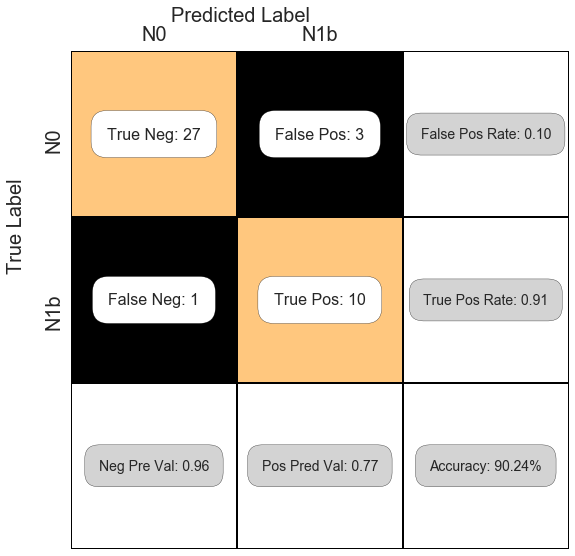

In [128]:
from sklearn.metrics import confusion_matrix
#from show_confusion_matrix import show_confusion_matrix
plt.figure()
mat=confusion_matrix(y_test, output)
show_confusion_matrix(confusion_matrix(y_test, output), ['N0','N1b'],'CM-GBRF.png')
mpl.rcParams['figure.figsize']=(2.0,1.0)

In [135]:
def show_confusion_matrix(class_labels=['0','1'],file=''):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    #assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    #tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];
    tn = 85; fp = 5; fn = 2; tp = 8;
    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.set_facecolor((1, 1, 1))
    ax.imshow([[20,  1],[ 1, 20]], interpolation='nearest', cmap=plt.cm.copper)
    
    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[-0.5,-0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[2.5,2.5], '-k', lw=2)

    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    ax.plot([-0.5,-0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([2.5,2.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=20)
    ax.grid(False)
    ax.set_frame_on(True)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''],fontsize=20)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=20, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90,fontsize=20)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)
    
    mpl.rcParams['figure.figsize']=(6.0,4.0)
    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            '%d'%(tn),size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='square,pad=1'))

    ax.text(0,1,
            '%d'%fn,size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='square,pad=1'))

    ax.text(1,0,
            '%d'%fp,size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='square,pad=1'))


    ax.text(1,1,
            '%d'%(tp),size=16,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='square,pad=1'))
    
   
    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'FPR: %.2f'%(fp / (fp+tn+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='square,pad=1'))

    ax.text(2,1,
            'TPR: %.2f'%(tp / (tp+fn+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='square,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%(((tp+tn+0.)/N)*100)+'%',size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='square,pad=1'))
    
    ax.text(0,2,
            'NPV: %.2f'%(1-fn/(fn+tn+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='square,pad=1'))

    ax.text(1,2,
            'PPV: %.2f'%(tp/(tp+fp+0.)),size=14,
            va='center',
            ha='center',
            bbox=dict(fc='lightgray',boxstyle='square,pad=1'))


    plt.tight_layout()
    
    plt.savefig(file)

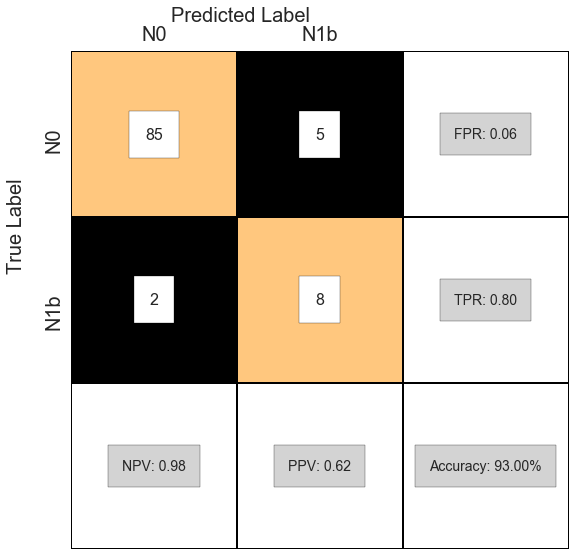

In [136]:
from sklearn.metrics import confusion_matrix
#from show_confusion_matrix import show_confusion_matrix
plt.figure()
mat=[[83,7],[3,7]]
mat[0]=[27,1]
mat[1]=[3,10]
show_confusion_matrix(['N0','N1b'],'CM-GBRF-temp5.png')
mpl.rcParams['figure.figsize']=(2.0,1.0)

In [50]:
print(confusion_matrix(y_test, output))

[[23  5]
 [ 4  9]]


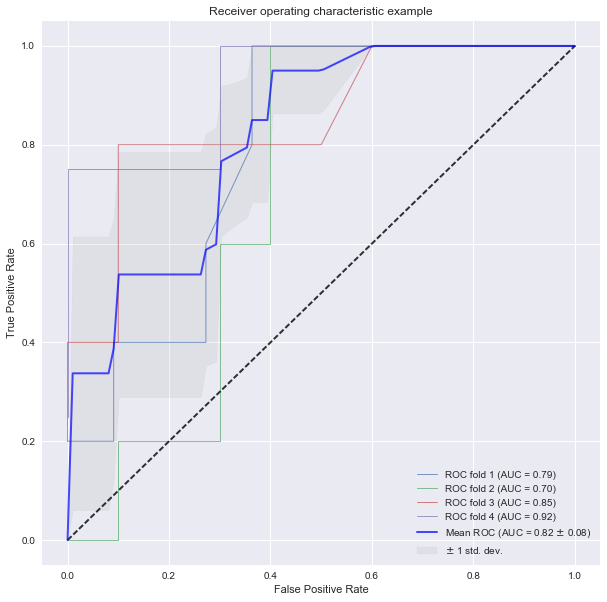

In [109]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=4)
classifier = RandomForestClassifier(n_estimators=150, class_weight='auto')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
mpl.rcParams['figure.figsize']=(10.0,10.0)
i = 0
for train, test in cv.split(X_train, y_train):
    probas_ = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.7,
             label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
          alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.7)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.1,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

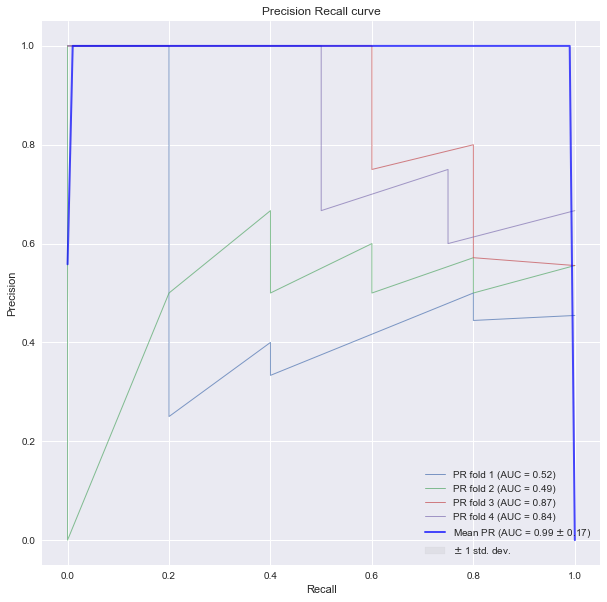

In [113]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=4)
classifier = RandomForestClassifier(n_estimators=200, class_weight='auto')

precisions = []
aucs = []
mean_recall = np.linspace(1, 0, 100)
mpl.rcParams['figure.figsize']=(10.0,10.0)
i = 0
for train, test in cv.split(X_train, y_train):
    probas_ = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area the curve
    precision, recall, thresholds = precision_recall_curve(y_train[test], probas_[:, 1])
    average_precision = average_precision_score(y_train[test], probas_[:, 1])
    
    precisions.append(interp(mean_recall, recall, precision))
    precisions[-1][0] = 0.0
    pr_auc = average_precision
    aucs.append(pr_auc)
    plt.plot(recall, precision, lw=1, alpha=0.7,
             label='PR fold %d (AUC = %0.2f)' % (i+1, pr_auc))

    i += 1


mean_precision = np.mean(precisions, axis=0)
#mean_precision[-1] = 1.0
mean_auc = auc(mean_recall, mean_precision)
std_auc = np.std(aucs)
plt.plot(mean_recall, mean_precision, color='b',
         label=r'Mean PR (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.7)

std_precision = np.std(precisions, axis=0)
precisions_upper = np.minimum(mean_precision + std_precision, 1)
precisions_lower = np.maximum(mean_precision - std_precision, 0)
plt.fill_between(mean_recall, precisions_lower, precisions_upper, color='grey', alpha=.1,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.legend(loc="lower right")
plt.show()

In [116]:
len(precisions[0])

100

In [169]:
feature_importances=pd.DataFrame(data.columns,columns=['Feature'])
for i in range(0,50):
    kf = cross_validation.StratifiedKFold(y_all, n_folds=2, shuffle=True)
    for train_index, test_index in kf:
        X_train_kf, X_test_kf, y_train_kf, y_test_kf = X_all[train_index], X_all[test_index], y_all[train_index], \
                                                   y_all[test_index]
        model=GradientBoostingClassifier(max_depth=2,n_estimators=17)
        model.fit(X_train_kf, y_train_kf)
        
        
        importance_list_boo = model.feature_importances_
        name_list = data.columns
        importance_list_boo, name_list_boo = zip(*sorted(zip(importance_list_boo, name_list)))
        temp_boo=pd.DataFrame(sorted(zip(importance_list_boo, name_list_boo)), columns=['Importance','Feature'])
        #feature_importance_boo=temp_boo[temp_boo['Importance']>0]
        feature_importance_boo=temp_boo
        feature_importances_temp=pd.merge(feature_importances,feature_importance_boo,on ='Feature',how='outer')
        feature_importances=feature_importances_temp
    

In [405]:
feature_importances.to_csv('Feature_importances.txt',sep="\t")


In [1025]:
logistic_l1=[]
logistic_l2=[]
random_forest=[]
adaBoost=[]
gradientBoosting=[]
for i in range(1,100):
    # Split testing and training sets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, test_size=0.40,stratify=y_all, random_state=i)
    num_of_crossval = 5
    
    # L2 regression
    tune_params = [{'C': [1000,100, 10,1.0, 0.1]}]
    final_Results_mat = []
    fold = 0
    model=LogisticRegression(C=100,penalty='l2')
    gsCV = GridSearchCV(model, tune_params, scoring='average_precision',cv=num_of_crossval, n_jobs=1)    
    gsCV.fit(X_train, y_train)
    logistic_l2.append(gsCV.best_estimator_)
    
    # L1 regression
    tune_params = [{'C': [1000,100, 10,1.0, 0.1]}]
    final_Results_mat = []
    fold = 0
    model=LogisticRegression(C=100,penalty='l1')
    gsCV = GridSearchCV(model, tune_params, scoring='average_precision',cv=num_of_crossval, n_jobs=1)    
    gsCV.fit(X_train, y_train)
    logistic_l1.append(gsCV.best_estimator_)
    
    # Random Forest
    classArray_train = np.zeros(len(y_train))
    classArray_test = np.zeros((len(y_test), num_of_crossval))
    tune_params = [{'n_estimators': [10, 20, 50, 100, 150, 200, 250, 300, 400, 450, 500]}]
    final_Results_mat = []
    fold = 0
    model=RandomForestClassifier(n_estimators=100, class_weight='auto')
    gsCV = GridSearchCV(model, tune_params, scoring='average_precision', cv=num_of_crossval, n_jobs=1)
    gsCV.fit(X_train, y_train)
    random_forest.append(gsCV.best_estimator_)
    
    # AdaBoost
    tune_params = {"n_estimators":[30, 40,50,100,150,200,300] }
    final_Results_mat = []
    fold = 0
    model=AdaBoostClassifier(n_estimators=100)
    gsCV = GridSearchCV(model, tune_params,scoring='average_precision', cv=num_of_crossval, n_jobs=1)    
    gsCV.fit(X_train, y_train)
    adaBoost.append(gsCV.best_estimator_)
    
    # Gradient Boost
    tune_params ={"n_estimators": [5,8,10,17,20,100,150],"max_depth":[1,2,3,4,5]}
    final_Results_mat = []
    fold = 0
    model=GradientBoostingClassifier()
    gsCV = GridSearchCV(model, tune_params, scoring='average_precision',cv=num_of_crossval, n_jobs=1)
    gsCV.fit(X_train, y_train)
    gradientBoosting.append(gsCV.best_estimator_)

KeyboardInterrupt: 

In [ ]:
adaBoost[9]

recall [ 1.          0.92307692  0.92307692  0.84615385  0.84615385  0.76923077
  0.76923077  0.69230769  0.69230769  0.61538462  0.53846154  0.53846154
  0.46153846  0.38461538  0.30769231  0.23076923  0.15384615  0.07692308
  0.        ]
precision [ 0.72222222  0.70588235  0.75        0.73333333  0.78571429  0.76923077
  0.83333333  0.81818182  0.9         0.88888889  0.875       1.          1.
  1.          1.          1.          1.          1.          1.        ]
thresholds [ 0.1654935   0.25368161  0.38127257  0.44035674  0.52453048  0.53280372
  0.55643808  0.62169145  0.85798357  0.86641347  0.87261793  0.88074205
  0.88378931  0.90184585  0.90304306  0.90820215  0.94477119  0.96110727]


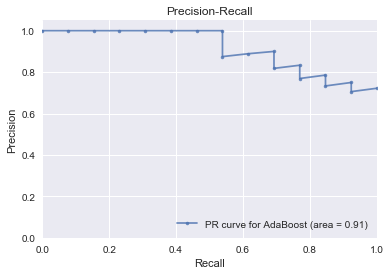

In [1021]:
mpl.rcParams['figure.figsize']=(6.0,4.0)
ax=make_pr("AdaBoost",gradientBoosting[4] , y_test, X_test, labe=15)